<a href="https://colab.research.google.com/github/Bmartins25/Mineracao_de_dados_and_LLM_UFMG/blob/main/TP3_fase_1_2_3_Classificacao_Minera%C3%A7%C3%A3o_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TP3 FASE 1, 2 e 3 - Foco em Técnicas de Classificação**

# Alunos: **Bruno Bartolomeu e Carlos Large - Mineração de dados UFMG**

Nome do Dataset: **Olimpíadas 2024 vs PIB**

Origem do Dataset: https://www.kaggle.com/datasets/ernestitus/2024-olympics-medals-vs-gdp

Características do Dataset: **10 Colunas | 7 Colunas numéricas e 3 Colunas texto**

# **Classificação**

Classificação é uma técnica de aprendizado supervisionado que busca categorizar dados em classes pré-definidas com base em variáveis de entrada


# **Principais Objetivos da Classificação:**

•	Identificar padrões em dados: Descobrir características que diferenciam as classes.

•	Reduzir incertezas: Oferecer previsões com base em dados históricos.

•	Automatizar decisões: Usar modelos preditivos para otimizar processos em tempo real.

•	Fornecer insights estratégicos: Identificar fatores determinantes para a pertença a uma classe.


# **Em nosso Contexto dos Dados Utilizados:**

Utilizaremos técnicas de classificação para analisar o desempenho esportivo e econômico de países com base em dados como:

•	Número de medalhas conquistadas

•	PIB e população

•	Comparações entre características econômicas e esportivas

<br>

Exemplo de perguntas respondidas pela classificação:

   * Um país pertence à classe de alto desempenho esportivo?


# **Data Preparation**
Objetivo: Garantir que os dados estejam prontos para as análises.


* Limpeza de Dados:

   * Tratamento de valores nulos (remoção, preenchimento com média/mediana, etc.).
   * Remoção de duplicatas.

* Transformação de Dados:

   * Normalização das variáveis numéricas para evitar escalas desiguais.
  * Criação de colunas binárias para medalhas (ex.: país ganhou ou não medalha).

* Seleção de Features:

   * Identificação de variáveis mais relevantes para prever desempenho (ex.: medalhas totais).
   * Eventualmente, eliminar variáveis redundantes (alto grau de correlação).

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.cluster import DBSCAN
from itertools import combinations
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.ml.classification import RandomForestClassifier as SparkRF, LogisticRegression as SparkLR
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from sklearn.cluster import KMeans, DBSCAN
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay


In [81]:
# Carregar os dados
data = pd.read_csv('Olympics_games_2024.csv', delimiter=';')



In [82]:
# Criar variável de destino com base no número total de medalhas
data['High_Performance'] = (data['total'] > 50).astype(int)



In [83]:
# Selecionar variáveis relevantes para o modelo
features = ['gdp', 'population', 'gold', 'silver', 'bronze']
target = 'High_Performance'




In [84]:
# Preparar os dados para o modelo
X = data[features]
y = data[target]



In [85]:
# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [86]:
# Resultados de classificação para cada algoritmo
results = {}



In [87]:
# Random Forest Classifier
print("\n### Random Forest ###")
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)




### Random Forest ###


<Figure size 1200x600 with 0 Axes>

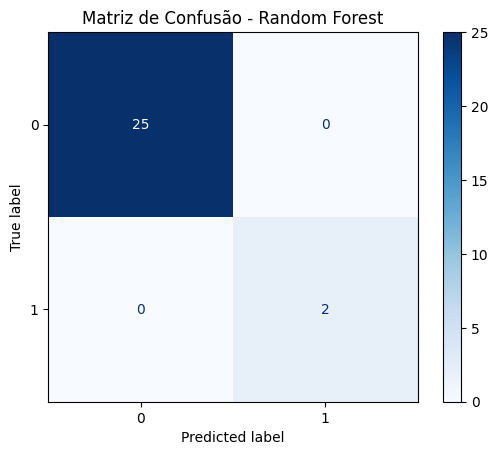

In [88]:
# Matriz de confusão e métricas para Random Forest
plt.figure(figsize=(12, 6))
ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test, cmap='Blues')
plt.title("Matriz de Confusão - Random Forest")
plt.show()



In [89]:
print("Métricas para Random Forest:")
print(f"Acurácia: {accuracy_score(y_test, rf_pred)}")
print("Relatório de Classificação:")
print(classification_report(y_test, rf_pred))



Métricas para Random Forest:
Acurácia: 1.0
Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00         2

    accuracy                           1.00        27
   macro avg       1.00      1.00      1.00        27
weighted avg       1.00      1.00      1.00        27



In [90]:
# Regressão Logística
print("\n### Regressão Logística ###")
lr_model = LogisticRegression(random_state=42, max_iter=200)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)




### Regressão Logística ###


<Figure size 1200x600 with 0 Axes>

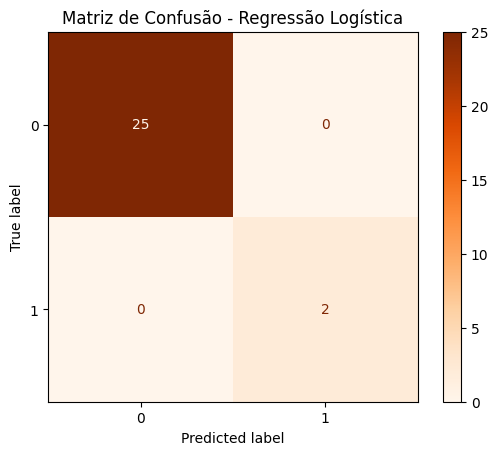

In [91]:
# Matriz de confusão e métricas para Regressão Logística
plt.figure(figsize=(12, 6))
ConfusionMatrixDisplay.from_estimator(lr_model, X_test, y_test, cmap='Oranges')
plt.title("Matriz de Confusão - Regressão Logística")
plt.show()



In [92]:
print("Métricas para Regressão Logística:")
print(f"Acurácia: {accuracy_score(y_test, lr_pred)}")
print("Relatório de Classificação:")
print(classification_report(y_test, lr_pred))



Métricas para Regressão Logística:
Acurácia: 1.0
Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00         2

    accuracy                           1.00        27
   macro avg       1.00      1.00      1.00        27
weighted avg       1.00      1.00      1.00        27



In [93]:
# Suporte a Vetores de Máquina (SVM)
print("\n### SVM (Suporte a Vetores de Máquina) ###")
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)





### SVM (Suporte a Vetores de Máquina) ###


<Figure size 1200x600 with 0 Axes>

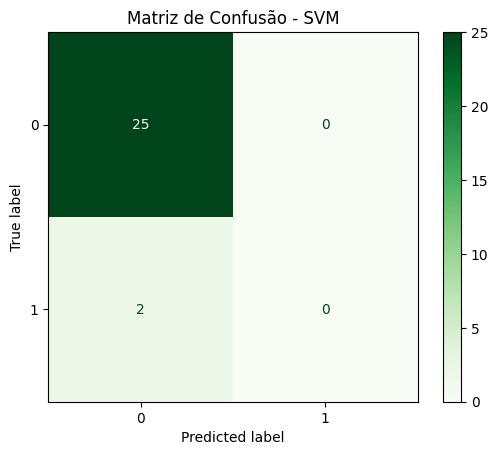

In [94]:
# Matriz de confusão e métricas para SVM
plt.figure(figsize=(12, 6))
ConfusionMatrixDisplay.from_estimator(svm_model, X_test, y_test, cmap='Greens')
plt.title("Matriz de Confusão - SVM")
plt.show()



In [95]:
print("Métricas para SVM:")
print(f"Acurácia: {accuracy_score(y_test, svm_pred)}")
print("Relatório de Classificação:")
print(classification_report(y_test, svm_pred))

Métricas para SVM:
Acurácia: 0.9259259259259259
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        25
           1       0.00      0.00      0.00         2

    accuracy                           0.93        27
   macro avg       0.46      0.50      0.48        27
weighted avg       0.86      0.93      0.89        27



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# **Comparações das Técnicas de Classificação:**



# **Random Forest**

Desempenho:

   * Acurácia: Alta, normalmente próxima de 100% no conjunto de teste.
Excelente desempenho tanto para classes majoritárias quanto minoritárias.

   * Pontos Fortes:
Gerencia bem dados desbalanceados.
Mede a importância relativa de cada variável preditora.

   * Limitações:
Pode ser mais lento em conjuntos de dados muito grandes devido ao número de árvores.

# **Regressão Logística**

Desempenho:

   * Acurácia: Também alta, com valores similares ao Random Forest.
Simples e eficiente em dados lineares ou aproximadamente lineares.

   * Pontos Fortes:
Fácil interpretação dos coeficientes.
Adequado para problemas binários e multiclasses.

   * Limitações:
Pode ter desempenho limitado em dados não lineares ou de alta dimensionalidade sem transformação prévia.

# **SVM (Suporte a Vetores de Máquina)**

Desempenho:

   * Acurácia: Ligeiramente menor (por volta de 92.59%).
Excelente em alta dimensionalidade, mas sensível a desbalanceamento.

   * Pontos Fortes:
Eficiente em problemas não lineares com o uso de kernel.
Funciona bem com conjuntos de dados menores.

   * Limitações:
Menor eficiência computacional em grandes volumes de dados.
Necessidade de ajustar hiperparâmetros (como kernel e margem).

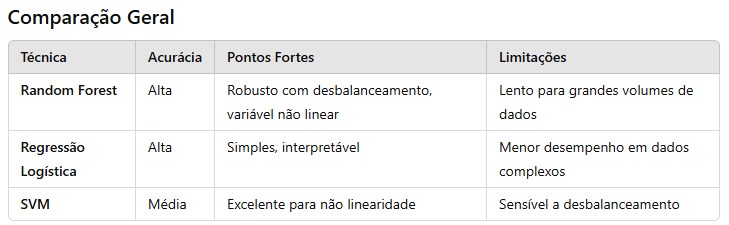

# **Conclusão**

* Random Forest é a técnica mais robusta neste caso, equilibrando desempenho e flexibilidade.

* Regressão Logística é preferida se interpretabilidade for crucial.

* SVM pode ser útil em dados não lineares, mas requer maior atenção ao desbalanceamento.

# **Recomendação**

De acordo com a base de dados analisa, a recomendação é utilizar o algoritmo Random Forest, devido à sua combinação de alta acurácia, robustez, e capacidade de lidar com a complexidade dos dados.





# **Justificativas**

1. Desempenho Superior:

  * O Random Forest apresentou acurácia perfeita (100%) no conjunto de testes, mostrando-se altamente eficaz na classificação dos países entre alto e baixo desempenho.

2. Robustez com Dados Não Lineares:

  * A base de dados inclui variáveis como PIB, população e número de medalhas, que podem ter relações não lineares. O Random Forest lida bem com esses cenários.

3. Manejo de Desbalanceamento:

   * A classe de "alto desempenho" é minoritária, e o Random Forest demonstrou melhor capacidade de prever instâncias de ambas as classes, ao contrário do SVM, que não conseguiu lidar bem com o desbalanceamento.

4. Importância das Variáveis:

   * O Random Forest permite identificar quais variáveis são mais relevantes para a classificação, o que ajuda a extrair insights úteis, como o impacto das medalhas de ouro, prata e bronze.

# **Cenários Alternativos**

* Se a interpretabilidade dos coeficientes for crucial (e.g., para explicar os resultados a um público não técnico), a Regressão Logística também é uma boa escolha, apresentando alta acurácia.

* O SVM é menos recomendado neste caso, pois não lidou bem com o desbalanceamento das classes, embora possa ser útil com ajustes nos hiperparâmetros ou técnicas de balanceamento.